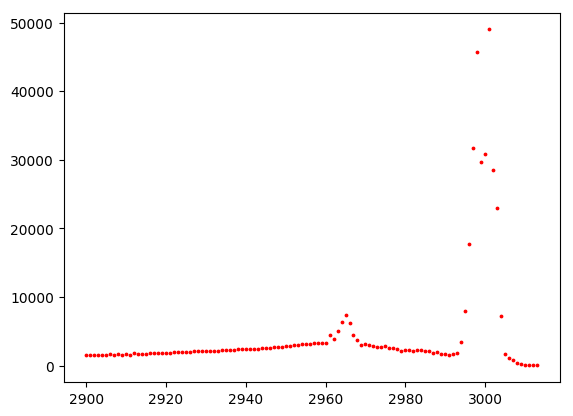

In [124]:
using DelimitedFiles, PyPlot
ori = readdlm("data.TXT",'\t')
len = size(ori,1)
function g(x)
    if x < 2961
        return (x-2900)*27+1614
    elseif x < 2969
        return 6000
    elseif x < 2994
        return 2900
    elseif x < 3007
        return 38000
    else 
        return 1200
    end
end

function G⃩(x)
    if x < 2961
        return 13.5(x-2900)^2+1614(x-2900)
    elseif x < 2969
        return 6000(x-2961)+148687.5
    elseif x < 2994
        return 2900(x-2969)+196687.5
    elseif x < 3007
        return 38000(x-2994)+269187.5
    else 
        return 1200(x-3007)+763187.5
    end
end

function _K(y)
    if y < 148687.5
        c = 807/13.5
        return sqrt(y/13.5+c^2)+2900-c
    elseif y < 196687.5
        return (y-148687.5)/6000+2961
    elseif y < 269187.5
        return (y-196687.5)/2900+2969
    elseif y < 763187.5
        return (y-269187.5)/38000+2994
    else 
        return (y-763187.5)/1200+3007
    end
end
K(y) = _K(771587.5y)
G(x) = G⃩(x)/G⃩(3014)

G (generic function with 1 method)

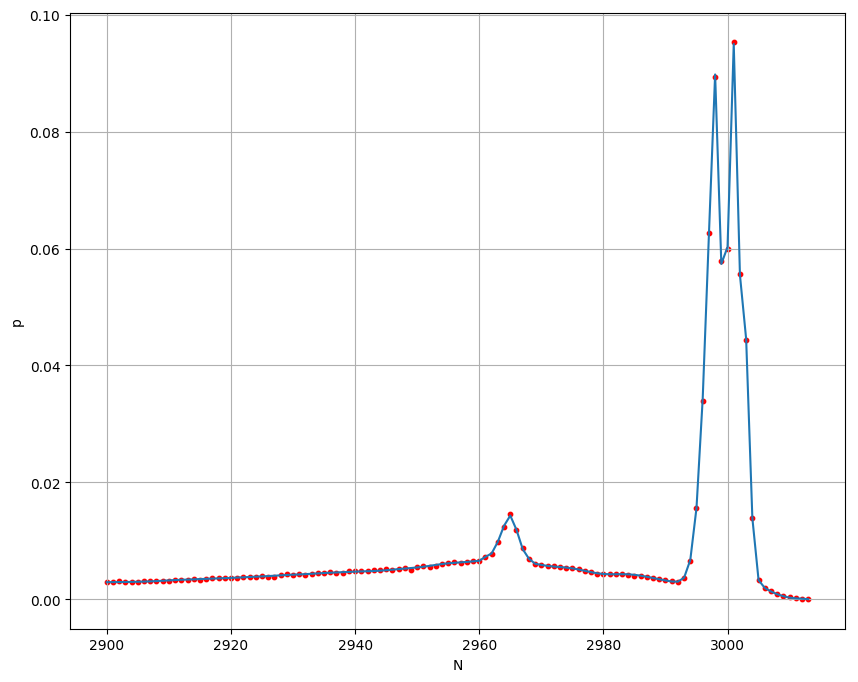

0.5132301910023167

In [149]:
fig = figure(figsize=[10,8])
grid()
xi = ori[:,1]
sum1 = sum(ori[:,2])
plot(xi,ori[:,2]/sum1)
xi = 2900:0.1:3013
c = G⃩(3014)/sum1

#C中数据
arr = readdlm("rand2.txt",'\n')
C = zeros(3013-2900+1)
for i in arr
    C[Int(i)-2899] += 1
end
scatter(2900:1:3013,C/sum(C),s=10,c="red")
xlabel("N")
ylabel("p")
show()
savefig("fig3.png")
1/c

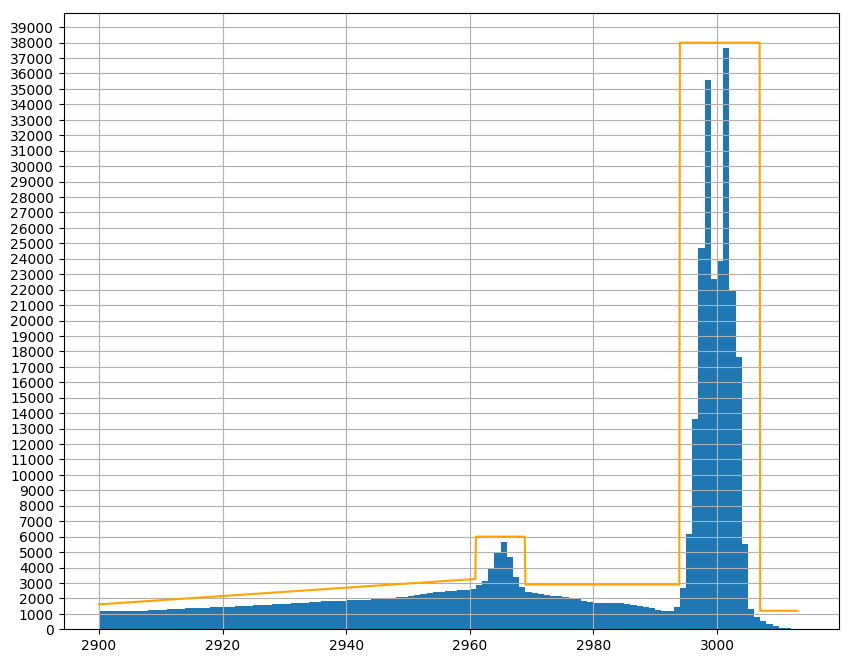

In [145]:
fig = figure(figsize=[10,8])
grid()
yticks(0:1000:40000)
xi = ori[:,1]
bar(xi.+0.5,ori[:,2],1)
xi = 2900:0.1:3013
plot(xi,g.(xi),c="orange")
savefig("./texfile/example2.png")